In [7]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def result_model(model,X,Y) :
    Y_model =model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)
    
   # Matrice de confusion
    cm_model = confusion_matrix(Y, Y_model)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm_model, annot = True)
    plt.title(str(model))
    plt.show()
    
    return(Y_model)

# Logistique

## Téléchargement des données

In [15]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v2.csv")

## Pre-processing
On sépare la variable à expliquer des variables explicatives.

In [16]:
X = train.drop(columns = 'Response')
Y = train['Response']

On sépare les données en train et test puis on les scale avec les méthodes de sklearn.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X_scal_train = scaler.fit_transform(X_train)
X_scal_test = scaler.transform(X_test) 

X_scal_train = pd.DataFrame(X_scal_train,index= X_train.index)
X_scal_test = pd.DataFrame(X_scal_test,index= X_test.index)

## Implémentation

On applique ensuite directement notre modèle :

Le f1 score vaut 0.19243156199677938


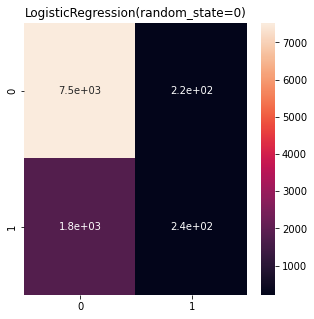

In [18]:
clf = LogisticRegression(random_state=0).fit(X_scal_train, Y_train)
f1 = result_model(clf, X_scal_test, Y_test)

En testant avec de la cross-validation les résultats ne sont améliorés.

In [38]:
X_scal = scaler.fit_transform(X)

clf = LogisticRegression(random_state=0)
scores = cross_val_score(clf, X_scal, Y, cv=5, scoring='f1')
print("F1 moyen de %0.2f avec un écart type de %0.2f" % (scores.mean(), scores.std()))

F1 moyen de 0.22 avec un écart type de 0.02


## Conclusion

Le résultat est, sans surprise majeure, peu satisfaisant, la régression logistique (qui, on rappelle, est l'équivalent de la régression linéaire en classification) n'est pas un modèle robuste, peu adapté à l'étude de données complexes. Si la précision naïve (% de bonnes précisions/% de mauvaises) est sauvée par l'importante proportion de Response = 0 ce n'est pas le cas du f1_score. On constate que le modèle est très déséquilibré et tend à presque tout classer dans la catégorie 0. 


<br><br><br><br>